# Численное интегрирование

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Параметры интеграла

In [3]:
a = 0
b = 1
dx = 0.01

## Подинтегральное выражение

$$f(x) = 3 \cdot x^2$$
$$I = \int_{a}^{b} 3 \cdot x^2\, dx$$

In [4]:
def F(x):
    return 3 * x**2

### График функциии

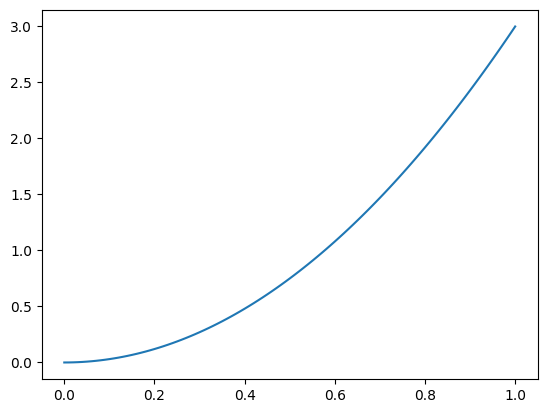

In [5]:
XX = np.arange(a, b + dx, dx)
YY = F(XX)

plt.plot(XX, YY)

## Метод прямоугольников
$$I = \sum_{x = a}^{b} F(x \mathrel{+=} dx) \cdot dx$$

In [6]:
def IntRect(a, b, dx, f):
    S = 0
    x = a
    while x < b - dx:
        S += f(x) * dx
        x += dx
    return S

In [7]:
I_rect = IntRect(a, b, dx, F)
I_rect

0.9556470000000011

## Метод тропеций

In [8]:
def IntTrop(a, b, dx, f):
    S = 0
    y1 = f(a)
    x = a + dx
    while x < b:
        y2 = f(x)
        S += (y1 + y2) / 2 * dx
        x += dx
        y1 = y2
    return S

In [9]:
I_trop = IntTrop(a, b, dx, F)
I_trop

0.9703485000000012

## Метод Симпсона

In [10]:
def IntSimpson(a, b, dx, f):
    S = 0
    y1 = f(a)
    x = a + dx
    while x < b:
        y12 = f(x - dx/2)
        y2 = f(x)
        S += (y1 + 4 * y12 + y2) * dx / 6
        x += dx
        y1 = y2
    return S

In [11]:
I_sim = IntSimpson(a, b, dx, F)
I_sim

0.9702990000000012

## Адаптивный метод

In [38]:
def IntAdaptive(a, b, f, eps = 0.01, N = 5, IntBase = IntSimpson):
    I1 = IntBase(a, b, (b - a) / N, f)
    I2 = IntBase(a, b, (b - a) / (N * 2), f)
    err = abs(I1 - I2)
    if err <= eps: return (I2, err)
    I1, err1 = IntAdaptive(a, (a + b) / 2, f, eps, N)
    I2, err2 = IntAdaptive((a + b) / 2, b, f, eps, N)
    return (I1 + I2, max(err1, err2))

In [42]:
I_adapt, err = IntAdaptive(a, b, F, 0.001)
I_adapt, err

(0.9993625488281246, 0.0009531249999999995)